In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from null_elections import *
from voting_rules import *
from rcv_dimensionality import *
from rcv_distribution import *
from interval_consistency import *

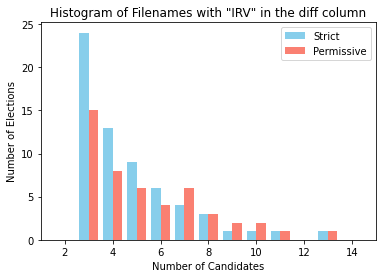

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Read data from strict.csv
strict_df = pd.read_csv('strict.csv')

# Read data from permissive.csv
permissive_df = pd.read_csv('permissive.csv')

# Count the number of filenames with 'IRV' in the diff column based on the number of candidates for strict_df
strict_irv_counts = strict_df[strict_df['diff'].apply(lambda x: 'IRV' in x)]['#candidates'].value_counts()

# Count the number of filenames with 'IRV' in the diff column based on the number of candidates for permissive_df
permissive_irv_counts = permissive_df[permissive_df['diff'].apply(lambda x: 'IRV' in x)]['#candidates'].value_counts()

# Plotting the histogram
plt.bar(strict_irv_counts.index - 0.2, strict_irv_counts.values, color='skyblue', width=0.4, label='Strict')
plt.bar(permissive_irv_counts.index + 0.2, permissive_irv_counts.values, color='salmon', width=0.4, label='Permissive')
plt.xlabel('Number of Candidates')
plt.ylabel('Number of Elections')
plt.title('Histogram of Filenames with "IRV" in the diff column')
plt.legend()
plt.xlim(1, 15)
plt.show()


In [25]:
file = "dataverse_files/Corvallis_11082022_Mayor.csv"
ballots, candidates = parse_election_data(file)

e = voting_rules(ballots, candidates)
print(e.irv())

Charles Maughan


In [26]:
test = perform_rcv_analysis(file, n_runs=1000)
mds_1d_coordinates, mds_2d_coordinates, most_common_order, order_frequencies, candidate_names = test

normalized_distances = get_distances_normalized(most_common_order, mds_1d_coordinates, candidate_names)
consistent_ballots = get_interval_consistent_ballots(ballots, normalized_distances)
print(consistent_ballots)

ballots:
[[ 0.  1.  2.]
 [ 0.  2.  1.]
 [ 0.  2.  1.]
 ...
 [nan nan nan]
 [nan  0.  2.]
 [nan nan nan]]


c:\Users\mahsh\Documents\GitHub\bugs-in-democracy\EIL summer 2023\rcv_dimensionality.py:174: RuntimeWarning: divide by zero encountered in true_divide
  distance = 1 / np.sqrt(freq_upper_triangle)


({('Andrew Struthers', 'Roen Hogg', 'Charles Maughan'): 2119, ('Andrew Struthers', 'Charles Maughan', 'Roen Hogg'): 3722, ('Andrew Struthers', 'Charles Maughan'): 511, ('Andrew Struthers', 'Roen Hogg'): 279, ('Andrew Struthers',): 521, ('Charles Maughan', 'Andrew Struthers', 'Roen Hogg'): 4405, ('Charles Maughan', 'Andrew Struthers'): 760, ('Charles Maughan', 'Roen Hogg'): 197, ('Charles Maughan',): 372, ('Roen Hogg',): 847, ('Roen Hogg', 'Andrew Struthers', 'Charles Maughan'): 2484, ('Roen Hogg', 'Andrew Struthers'): 228, ('Roen Hogg', 'Charles Maughan'): 168}, 0.8062606163552536)


In [27]:
e2 = voting_rules(consistent_ballots[0], candidates)
print(e2.irv())

Andrew Struthers


In [28]:
print(consistent_ballots[1])

0.8062606163552536


In [6]:


# Read data from strict.csv
strict_df = pd.read_csv('strict.csv')

# Read data from permissive.csv
permissive_df = pd.read_csv('permissive.csv')

# Get filenames with 'IRV' in diff column in permissive.csv and not in strict.csv
permissive_irv_files = permissive_df[permissive_df['diff'].str.contains('IRV') & ~strict_df['diff'].str.contains('IRV')]['filename']

# Print the filenames
print("Filenames in permissive.csv with 'IRV' in diff and not in strict.csv:")
for filename in permissive_irv_files:
    print(filename)


Filenames in permissive.csv with 'IRV' in diff and not in strict.csv:
Burlington_03072006_Mayor.csv
Corvallis_11082022_Mayor.csv
Maine_06122018_DemocraticPrimaryforCD2.csv
Maine_07142020_DemocraticCandidateforMaineStateHouseDistrict41.csv
Maine_07142020_DemocraticCandidateforMaineStateHouseDistrict49.csv
Maine_07142020_DemocraticCandidateforMaineStateHouseDistrict90.csv
Minneapolis_11022021_CityCouncilWard2.csv
Minneapolis_11022021_CityCouncilWard5.csv
Minneapolis_11022021_ParkBoardDistrict2.csv
Minneapolis_11072017_Ward1CityCouncil.csv
NewYorkCity_06222021_DEMBoroughPresidentQueens.csv
NewYorkCity_06222021_DEMCouncilMember18thCouncilDistrict.csv
NewYorkCity_06222021_DEMCouncilMember25thCouncilDistrict.csv
NewYorkCity_06222021_REPBoroughPresidentRichmond.csv
NewYorkCity_06222021_REPCouncilMember50thCouncilDistrict.csv
Oakland_11032020_MemberCityCouncilAtLargeOaklandRCV.csv
Oakland_11032020_MemberCityCouncilDist5OaklandRCV.csv
Oakland_11032020_SchoolDirectorDist7OaklandRCV.csv
Oakland_1